In [11]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori
from sklearn.compose import ColumnTransformer 
from mlxtend.frequent_patterns     import association_rules 

# Loading the dataset

In [12]:
df =pd.read_csv( "market_basket.csv", sep=",")
df

,shrimp,almonds,avocado,vegetables mix,green grapes
0,burgers,meatballs,eggs,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea
4,low fat yogurt,NaN,NaN,NaN,NaN


# data preprocessing and visualisation

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shrimp          5 non-null      object
 1   almonds         3 non-null      object
 2   avocado         2 non-null      object
 3   vegetables mix  1 non-null      object
 4   green grapes    1 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


In [14]:
df.fillna("0",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shrimp          5 non-null      object
 1   almonds         5 non-null      object
 2   avocado         5 non-null      object
 3   vegetables mix  5 non-null      object
 4   green grapes    5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


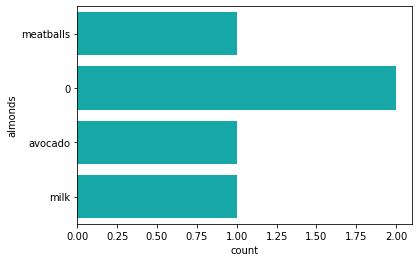

In [15]:
sns.countplot(y="almonds", data=df, color="c");

In [ ]:
sns.countplot(y="avocado", data=df, color="c");

# creating lists

In [16]:
A=df.columns
   


In [17]:
A

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes'], dtype='object')

In [18]:
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = df.apply(le.fit_transform)
X_2


,shrimp,almonds,avocado,vegetables mix,green grapes
0,0,2,1,0,0
1,1,0,0,0,0
2,4,1,0,0,0
3,3,3,2,1,1
4,2,0,0,0,0


In [19]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()

onehotlabels


array([[1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.]])

In [20]:
onehotlabels.shape


(5, 16)

we have the same number of rows 
but now we have so many more columns due to how we changed all the categorical data into numerical data

# apriori algorithm

In [21]:
df_en=onehotlabels



In [22]:
# Let’s select itemsets with a minimum of 60% Support


df_en=pd.DataFrame(df_en)
frequent_itemset=apriori(df_en,min_support=0.6,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.6,(9)
1,0.8,(12)
2,0.8,(14)
3,0.6,"(9, 12)"
4,0.6,"(9, 14)"
5,0.8,"(12, 14)"
6,0.6,"(9, 12, 14)"


In [23]:

association_rules(frequent_itemset,metric="confidence",min_threshold=0.7)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(12),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(12),(9),0.8,0.6,0.6,0.75,1.25,0.12,1.6
2,(9),(14),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(14),(9),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(12),(14),0.8,0.8,0.8,1.00,1.25,0.16,inf
5,(14),(12),0.8,0.8,0.8,1.00,1.25,0.16,inf
6,"(9, 12)",(14),0.6,0.8,0.6,1.00,1.25,0.12,inf
7,"(9, 14)",(12),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(12, 14)",(9),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,(9),"(12, 14)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [24]:
association_rules(frequent_itemset,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(9),(12),0.6,0.8,0.6,1.0,1.25,0.12,inf
1,(9),(14),0.6,0.8,0.6,1.0,1.25,0.12,inf
2,(12),(14),0.8,0.8,0.8,1.0,1.25,0.16,inf
3,(14),(12),0.8,0.8,0.8,1.0,1.25,0.16,inf
4,"(9, 12)",(14),0.6,0.8,0.6,1.0,1.25,0.12,inf
5,"(9, 14)",(12),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,(9),"(12, 14)",0.6,0.8,0.6,1.0,1.25,0.12,inf


(14) and 12 have strong association 